# COSMOQUAKE

In [1]:
# !pip install obspy
# !pip install tensorflow
# !pip install sklearn

# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
# from google.colab import drive
# drive.mount('/content/drive')

## Team EARFQUAKE CNN model predictor for NASA SPACE APPS 2024

In [145]:
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat.head(15)

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
5,xa.s12.00.mhz.1970-06-15HR00_evid00008,1970-06-15T19:00:00.000000,68400.0,evid00008,impact_mq
6,xa.s12.00.mhz.1970-06-26HR00_evid00009,1970-06-26T20:01:00.000000,72060.0,evid00009,impact_mq
7,xa.s12.00.mhz.1970-07-20HR00_evid00010,1970-07-20T05:06:00.000000,18360.0,evid00010,impact_mq
8,xa.s12.00.mhz.1970-07-20HR00_evid00011,1970-07-20T11:44:00.000000,42240.0,evid00011,deep_mq
9,xa.s12.00.mhz.1970-09-26HR00_evid00013,1970-09-26T19:57:00.000000,71820.0,evid00013,impact_mq


## Select a detection

Let's pick the first seismic event in the catalog and let's take a look at the absolute time data. The way we show it here is by using pandas `.iloc` and datetime `.strptime`. We are going to keep the format shown in the absolute time header, which is `'%Y-%m-%dT%H:%M:%S.%f'`

In [147]:
row = cat.iloc[15]
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
arrival_time

datetime.datetime(1971, 1, 15, 12, 40)

In [149]:
# If we want the value of relative time, we don't need to use datetime
arrival_time_rel = row['time_rel(sec)']
arrival_time_rel

45600.0

In [151]:
# Let's also get the name of the file
test_filename = row.filename
test_filename

'xa.s12.00.mhz.1971-01-15HR00_evid00022'

In [153]:
data = {
    "file_name": cat.filename ,
    "arrival_time": cat["time_rel(sec)"]}
y = pd.DataFrame(data)
y.file_name.tolist()

['xa.s12.00.mhz.1970-01-19HR00_evid00002',
 'xa.s12.00.mhz.1970-03-25HR00_evid00003',
 'xa.s12.00.mhz.1970-03-26HR00_evid00004',
 'xa.s12.00.mhz.1970-04-25HR00_evid00006',
 'xa.s12.00.mhz.1970-04-26HR00_evid00007',
 'xa.s12.00.mhz.1970-06-15HR00_evid00008',
 'xa.s12.00.mhz.1970-06-26HR00_evid00009',
 'xa.s12.00.mhz.1970-07-20HR00_evid00010',
 'xa.s12.00.mhz.1970-07-20HR00_evid00011',
 'xa.s12.00.mhz.1970-09-26HR00_evid00013',
 'xa.s12.00.mhz.1970-10-24HR00_evid00014',
 'xa.s12.00.mhz.1970-11-12HR00_evid00015',
 'xa.s12.00.mhz.1970-12-11HR00_evid00017',
 'xa.s12.00.mhz.1970-12-27HR00_evid00019',
 'xa.s12.00.mhz.1970-12-31HR00_evid00021',
 'xa.s12.00.mhz.1971-01-15HR00_evid00022',
 'xa.s12.00.mhz.1971-01-28HR00_evid00023',
 'xa.s12.00.mhz.1971-01-29HR00_evid00024',
 'xa.s12.00.mhz.1971-02-09HR00_evid00026',
 'xa.s12.00.mhz.1971-03-25HR00_evid00028',
 'xa.s12.00.mhz.1971-04-13HR00_evid00029',
 'xa.s12.00.mhz.1971-04-17HR00_evid00030',
 'xa.s12.00.mhz.1971-05-12HR00_evid00031',
 'xa.s12.00

## Read the CSV file corresponding to that detection

We will now find the csv data file corresponding to that time and plot it!

In [155]:
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_file = f'{data_directory}{test_filename}.csv'
data_cat = pd.read_csv(csv_file)
data_cat

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1971-01-15T00:00:00.258000,0.000000,-1.813238e-15
1,1971-01-15T00:00:00.408943,0.150943,-6.975340e-16
2,1971-01-15T00:00:00.559887,0.301887,2.335177e-16
3,1971-01-15T00:00:00.710830,0.452830,1.821918e-16
4,1971-01-15T00:00:00.861774,0.603774,-6.603485e-16
...,...,...,...
572406,1971-01-16T00:00:01.163660,86400.905660,-4.188665e-17
572407,1971-01-16T00:00:01.314604,86401.056604,-3.584254e-17
572408,1971-01-16T00:00:01.465547,86401.207547,-3.442232e-17
572409,1971-01-16T00:00:01.616491,86401.358491,-3.040052e-17


In [159]:
X = []
for i in y.file_name.tolist():
    try:
        X.append(pd.read_csv(f"{data_directory}{i}.csv")[["time_rel(sec)", "velocity(m/s)"]])
    except FileNotFoundError:
        print(f"{i} does not exist")
len(X)

74

In [ ]:
X

[       time_abs(%Y-%m-%dT%H:%M:%S.%f)  time_rel(sec)  velocity(m/s)
 0          1970-01-19T00:00:00.665000       0.000000  -6.153279e-14
 1          1970-01-19T00:00:00.815943       0.150943  -7.701288e-14
 2          1970-01-19T00:00:00.966887       0.301887  -8.396187e-14
 3          1970-01-19T00:00:01.117830       0.452830  -8.096155e-14
 4          1970-01-19T00:00:01.268774       0.603774  -7.097599e-14
 ...                               ...            ...            ...
 572410     1970-01-20T00:00:02.174434   86401.509434  -1.472713e-14
 572411     1970-01-20T00:00:02.325377   86401.660377  -1.956104e-14
 572412     1970-01-20T00:00:02.476321   86401.811321  -2.240307e-14
 572413     1970-01-20T00:00:02.627264   86401.962264  -2.998405e-14
 572414     1970-01-20T00:00:02.778208   86402.113208  -4.465515e-14
 
 [572415 rows x 3 columns],
        time_abs(%Y-%m-%dT%H:%M:%S.%f)  time_rel(sec)  velocity(m/s)
 0          1970-03-25T00:00:00.440000       0.000000  -5.481780e-15
 1  

In [157]:
y = y[y['file_name'] != 'xa.s12.00.mhz.1971-04-13HR00_evid00029']
y = y.drop(y.index[44])
y

,file_name,arrival_time
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,73500.0
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,12720.0
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,73020.0
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,4440.0
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,52140.0
...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,63780.0
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,65700.0
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,36300.0
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,57780.0


In [19]:
del X[44]

In [19]:
y = y["arrival_time"].tolist()

74

In [ ]:
num_windows = 250
window_size = 572411 // num_windows  # ≈572 time points per window
stride = window_size  # Non-overlapping windows

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, average_precision_score

In [163]:
def prepare_dataset(X, y, num_windows=500):
    """
    Processes all samples to create windowed data and corresponding labels, including augmentation around the event window.

    Parameters:
    - X (List[pd.DataFrame]): List of input DataFrames.
    - y (pd.DataFrame): Target DataFrame with 'file_name' and 'arrival_rel_time'.
    - num_windows (int): Number of windows per sample.
    - shift_range (int): Number of windows to shift around the event for augmentation.

    Returns:
    - np.ndarray: Windowed feature data.
    - np.ndarray: Corresponding labels.
    - np.ndarray: Group identifiers for each window.
    """
    X_all = []
    y_all = []
    X_shifted = []
    y_shifted = []
    groups = []  # To keep track of original samples for group-wise splitting

    for idx, df in enumerate(X):
        file_name = y.iloc[idx]['file_name']
        arrival_rel_time = y.iloc[idx]['arrival_time']

        # Split into windows and augment around event
        windows, labels, shifted_windows = split_and_augment_windows(df, num_windows=num_windows, arrival_rel_time=arrival_rel_time)
        window_size = len(windows[0])

        X_shifted.extend([i[0]for i in shifted_windows])
        y_shifted.extend([i[1] for i in shifted_windows])

        # Append to all data
        for window_idx, window in enumerate(windows):
            X_all.append(window.values)  # Convert DataFrame to numpy array
            y_all.append(labels[window_idx])
            groups.append(idx)  # Group by original sample index

    X_array = np.array(X_all)  # Shape: (samples*num_windows, window_size, num_features)
    y_array = np.array(y_all)
    groups = np.array(groups)

    return X_array, y_array, groups, X_shifted, y_shifted

def create_shifted_windows(event_idx, df, window_size):
    """
    Creates additional windows by shifting around the event window.

    Parameters:
    - event_window (int): The index of the window containing the event.
    - shift_range (int): The number of shifts to generate (both forward and backward).
    - df (pd.DataFrame): The input DataFrame.
    - window_size (int): The size of each window.

    Returns:
    - List[pd.DataFrame]: List of shifted windows around the event.
    """
    windows = []
    windows_event_idx = []
    total_rows = len(df)
    shift_range = window_size - 1

    for shift in range(-shift_range, 0):
        start_idx = int(event_idx + (shift))
        end_idx = int(start_idx + window_size)
        # Ensure the shifted window doesn't go out of bounds
        if start_idx >= 0 and end_idx <= total_rows:
            window = df.iloc[start_idx:end_idx].reset_index(drop=True)
            windows.append([window, event_idx])

    return windows

def split_and_augment_windows(df, num_windows=500, arrival_rel_time=None):
    """
    Splits DataFrame into windows and augments data with shifted windows around the event,
    ensuring the event is positioned at the edge of the windows.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - num_windows (int): Number of windows to split into.
    - arrival_rel_time (int): Row index where the event occurred.

    Returns:
    - List[pd.DataFrame]: List of windowed DataFrames.
    - List[int]: List of labels for each window.
    """
    total_rows = len(df)
    window_size = total_rows // num_windows
    windows = []
    labels = []

    # Split into regular windows
    for i in range(num_windows):
        start_idx = i * window_size
        end_idx = start_idx + window_size
        window = df.iloc[start_idx:end_idx].reset_index(drop=True)
        windows.append(window)
        labels.append(0)  # Initialize all windows with label 0

    # Identify the event window and create additional shifted windows
    if arrival_rel_time is not None:
        event_idx = arrival_rel_time
        event_window = int(event_idx // window_size)  # Convert to integer
        labels[event_window] = 1  # Original event window label   # Original event window label
        
        # Create additional windows with the event at the edges
        shifted_windows = create_shifted_windows(event_idx, df, window_size)
        windows.extend([item[0] for item in shifted_windows])
        labels.extend([1] * len(shifted_windows))  # Label all shifted windows as 1

    return windows, labels, shifted_windows

In [165]:
print("Preparing dataset by splitting into windows and assigning labels...")
X_windowed, y_labels, groups, X_shifted, y_shifted = prepare_dataset(X, y, num_windows=500)
print(f"Windowed data shape: {X_windowed.shape}")  # Expected: (74,000, 572, 3)
print(f"Labels distribution: {np.bincount(y_labels)}")

Preparing dataset by splitting into windows and assigning labels...
Windowed data shape: (121582, 1144, 2)
Labels distribution: [36926 84656]


In [191]:
len(y_shifted)

84582

In [169]:
index_timeline = X[0]["time_rel(sec)"].tolist()

7870.188679245283


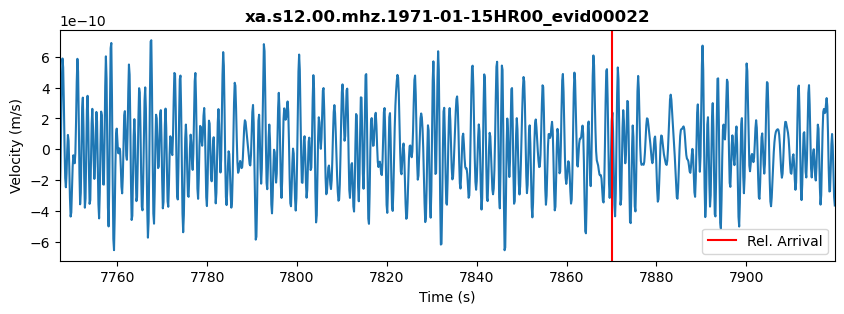

In [171]:
# Read in time steps and velocities
index = 4900

csv_times = np.array(X_shifted[index]["time_rel(sec)"].tolist())
csv_data = np.array(X_shifted[index]["velocity(m/s)"].tolist())

# Plot the trace!
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)

# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')

arrival_time_rel = y_shifted[index]
print(index_timeline[int(arrival_time_rel)])
# Plot where the arrival time is
arrival_line = ax.axvline(x=index_timeline[int(arrival_time_rel)], c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])

In [173]:
print("Computing class weights to handle class imbalance...")
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_labels),
    y=y_labels
)
class_weights = {0: class_weights_array[0], 1: class_weights_array[1]}
print(f"Class weights: {class_weights}")

Computing class weights to handle class imbalance...
Class weights: {0: 1.6462925851703407, 1: 0.7180944055944056}


In [175]:
print("Normalizing feature data...")
# Reshape to 2D for scaler: (samples*num_windows * time_steps, features)
samples, time_steps, features = X_windowed.shape
X_reshaped = X_windowed.reshape(-1, features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)

# Reshape back to 3D
X_normalized = X_scaled.reshape(samples, time_steps, features)
print(f"Normalized data shape: {X_normalized.shape}")

Normalizing feature data...
Normalized data shape: (121582, 1144, 2)


In [176]:
print("Splitting data into training and validation sets...")

# Use GroupKFold to split based on original samples
gkf = GroupKFold(n_splits=5)  # a80% train, 20% validation

# We'll perform one split (e.g., first fold)
train_idx, val_idx = next(gkf.split(X_normalized, y_labels, groups=groups))

X_train, X_val = X_normalized[train_idx], X_normalized[val_idx]
y_train, y_val = y_labels[train_idx], y_labels[val_idx]
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Training labels distribution: {np.bincount(y_train)}")
print(f"Validation labels distribution: {np.bincount(y_val)}")

Splitting data into training and validation sets...
Training set shape: (96937, 1144, 2), Training labels shape: (96937,)
Validation set shape: (24645, 1144, 2), Validation labels shape: (24645,)
Training labels distribution: [29441 67496]
Validation labels distribution: [ 7485 17160]


In [43]:
print(X_train.shape[1], X_train.shape[2])

1144 2


In [127]:
def build_cnn_model(input_shape):
    """
    Builds and compiles a 1D CNN model for binary classification.

    Parameters:
    - input_shape (tuple): Shape of the input data (time_steps, features).

    Returns:
    - tf.keras.Model: Compiled CNN model.
    """
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')   # Binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    return model

# Define input shape
input_shape = (X_train.shape[1], X_train.shape[2])  # (572, 3)

# Build the model
print("Building the CNN model...")
model = build_cnn_model(input_shape)
model.summary()

Building the CNN model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 1142, 64)            │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 571, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 569, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 284, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36352)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,326,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,351,809 (8.97 MB)

 Trainable params: 2,351,809 (8.97 MB)

 Non-trainable params: 0 (0.00 B)

In [129]:
X_train.shape

(96937, 1144, 2)

In [49]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

# Train the model
print("Training the model...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)


Training the model...
Epoch 1/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 81s 203ms/step - accuracy: 0.9456 - auc: 0.9300 - loss: 0.2482 - val_accuracy: 0.9578 - val_auc: 0.9307 - val_loss: 0.2025 - learning_rate: 0.0010
Epoch 2/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 72s 190ms/step - accuracy: 0.9563 - auc: 0.9465 - loss: 0.2079 - val_accuracy: 0.9404 - val_auc: 0.9287 - val_loss: 0.1937 - learning_rate: 0.0010
Epoch 3/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 73s 192ms/step - accuracy: 0.9594 - auc: 0.9555 - loss: 0.1938 - val_accuracy: 0.9218 - val_auc: 0.9368 - val_loss: 0.2512 - learning_rate: 0.0010
Epoch 4/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 72s 191ms/step - accuracy: 0.9594 - auc: 0.9644 - loss: 0.1811 - val_accuracy: 0.9068 - val_auc: 0.9429 - val_loss: 0.2937 - learning_rate: 0.0010
Epoch 5/50
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9615 - auc: 0.9714 - loss: 0.1660
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
379/379 ━━━━━━━━━━━━━━━━━━━━ 81s 188ms/step - accura

Evaluating the model on validation data...
771/771 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7485
           1       0.94      0.97      0.96     17160

    accuracy                           0.94     24645
   macro avg       0.94      0.92      0.93     24645
weighted avg       0.94      0.94      0.94     24645

Validation AUC-ROC: 0.9286


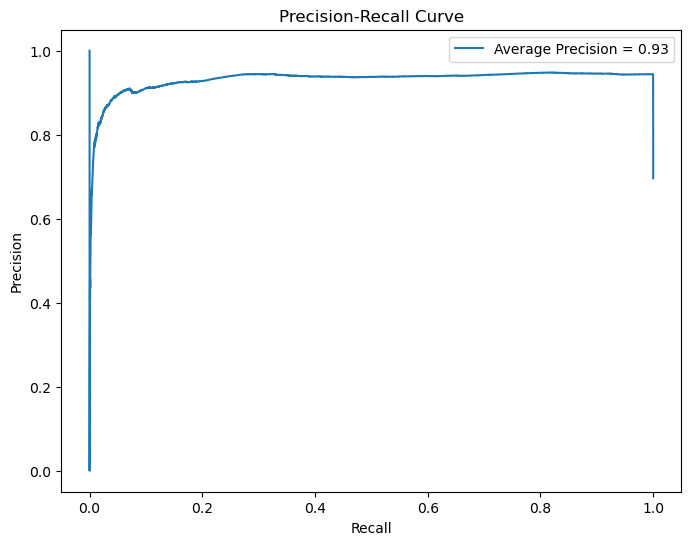

In [51]:
print("Evaluating the model on validation data...")
y_pred_prob = model.predict(X_val).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# ROC AUC Score
auc = roc_auc_score(y_val, y_pred_prob)
print(f"Validation AUC-ROC: {auc:.4f}")

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_prob)
average_precision = average_precision_score(y_val, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Plotting training history...


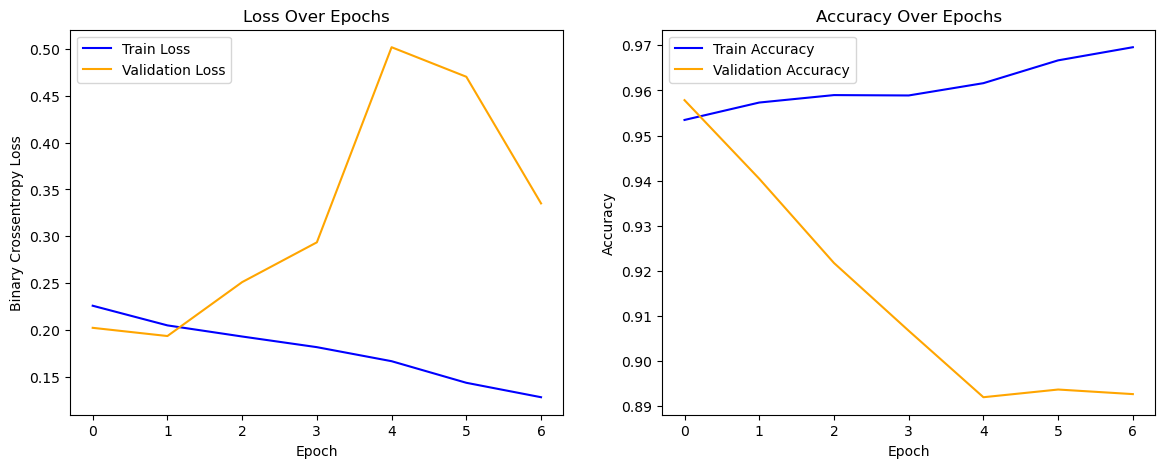

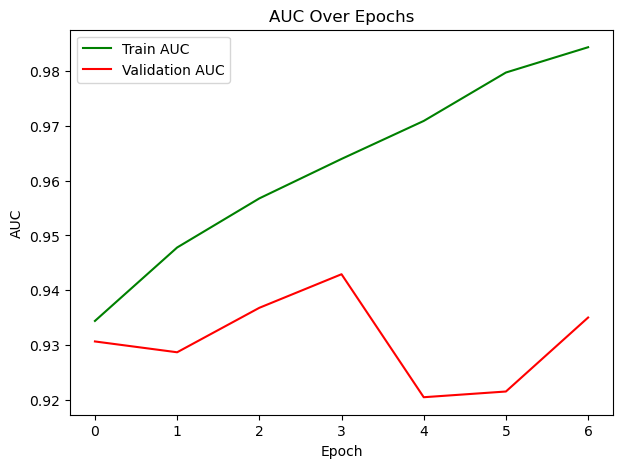

In [53]:
def plot_training_history(history):
    """
    Plots training and validation loss and accuracy over epochs.

    Parameters:
    - history (tf.keras.callbacks.History): Training history.
    """
    # Plot Loss
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Plot AUC
    plt.figure(figsize=(7, 5))
    plt.plot(history.history['auc'], label='Train AUC', color='green')
    plt.plot(history.history['val_auc'], label='Validation AUC', color='red')
    plt.title('AUC Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()
    plt.show()

# Plot the training history
print("Plotting training history...")
plot_training_history(history)

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      6057
           1       0.75      1.00      0.85      3435

    accuracy                           0.88      9492
   macro avg       0.87      0.90      0.87      9492
weighted avg       0.91      0.88      0.88      9492



In [100]:
y_train[0]

0

In [131]:
X_train[0]

array([[-7.95574337e-01,  1.92112388e-04],
       [-7.95567493e-01,  1.69259046e-04],
       [-7.95560649e-01,  1.59000228e-04],
       ...,
       [-7.87765616e-01, -2.31900052e-03],
       [-7.87758772e-01,  2.13945252e-03],
       [-7.87751928e-01,  6.61312409e-03]])

In [193]:
X_pos = X_shifted
y_pos = y_shifted
len(y_pos)

84582

In [195]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42)

In [197]:
for i in range(len(X_train_pos)):
  X_train_pos[i] = X_train_pos[i].values

X_train_pos = np.array(X_train_pos)
y_train_pos = np.array(y_train_pos)

for i in range(len(X_test_pos)):
  X_test_pos[i] = X_test_pos[i].values

X_test_pos = np.array(X_test_pos)
y_test_pos = np.array(y_test_pos)

X_train_pos.shape

(67665, 1144, 2)

In [203]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=6, restore_best_weights=True)
# input_shape = (X_train_pos.shape[1], X_train_pos.shape[2])
model2 = models.Sequential([
    layers.Input(shape=(1144,2)),  # Define the input layer explicitly
    layers.Conv1D(filters=16, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer
    ])
model2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model2.fit(X_train_pos, y_train_pos, epochs=100, batch_size=128, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - loss: 106522640.0000 - val_loss: 108235.4688
Epoch 2/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 109771.0703 - val_loss: 108381.8203
Epoch 3/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 111342.8438 - val_loss: 107345.0859
Epoch 4/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 111431.6016 - val_loss: 107156.9375
Epoch 5/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 111480.4766 - val_loss: 107850.1797
Epoch 6/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 113672.0625 - val_loss: 107125.6172
Epoch 7/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 114633.7344 - val_loss: 107490.4453
Epoch 8/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 116120.9531 - val_loss: 107414.2734


In [205]:

 # Predict on the test set
y_pred = model2.predict(X_test_pos)

529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [207]:
y_test_pos

array([84060., 19800., 55080., ..., 52140., 36300., 72060.])

9916.981132075472
Predicted: 9924.075471698114


C:\Users\aliko\AppData\Local\Temp\ipykernel_15088\977317563.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted: {index_timeline[int(arrival_predicted_time)]}")
C:\Users\aliko\AppData\Local\Temp\ipykernel_15088\977317563.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  arrival_line = ax.axvline(x=index_timeline[int(arrival_predicted_time)], c='red', label='Predicted')


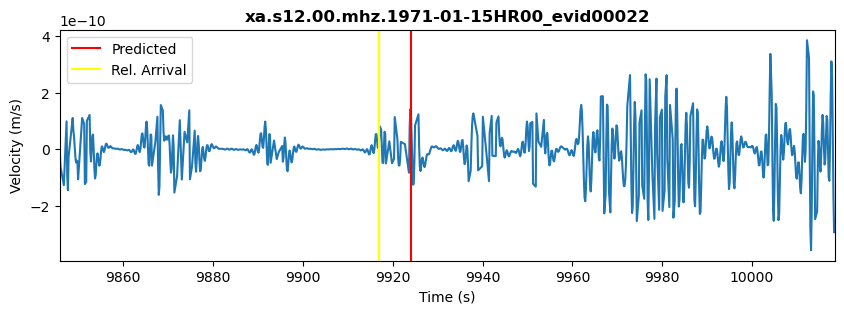

In [215]:
# Read in time steps and velocities
index = 7
csv_times = np.array([i[0] for i in X_test_pos[index]])
csv_data = np.array([i[1] for i in X_test_pos[index]])

# Plot the trace!
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)

# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')

arrival_time_rel = y_test_pos[index]
arrival_predicted_time = y_pred[index]
print(index_timeline[int(arrival_time_rel)])
print(f"Predicted: {index_timeline[int(arrival_predicted_time)]}")
# Plot where the arrival time is
arrival_line = ax.axvline(x=index_timeline[int(arrival_predicted_time)], c='red', label='Predicted')
arrival_lines = ax.axvline(x=index_timeline[int(arrival_time_rel)], c='yellow', label='Rel. Arrival')
ax.legend(handles=[arrival_line, arrival_lines])